In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
sah = pd.read_excel("../data/Sa_table_h.xlsx",index_col=0).sort_values(["STAID","EQID"]).reset_index(drop=True)
sav = pd.read_excel("../data/Sa_table_v.xlsx",index_col=0).sort_values(["STAID","EQID"]).reset_index(drop=True)

In [99]:
stal = list(sah.STAID.unique())
print(len(sah),len(sav))

1164 1164


Match!


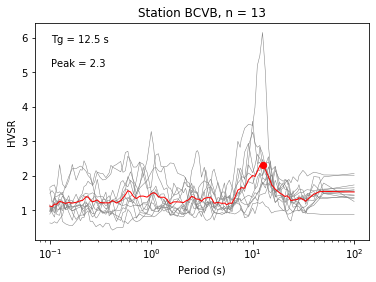

Match!


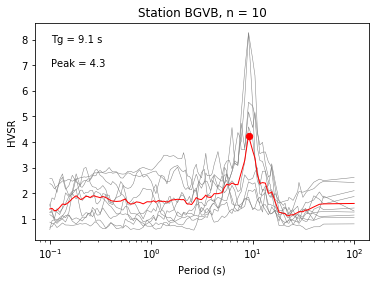

Match!


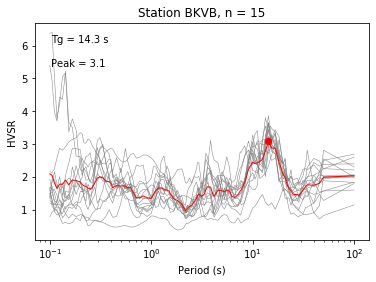

Match!


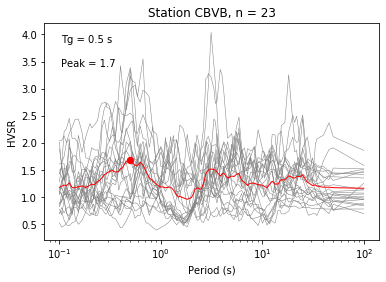

Match!


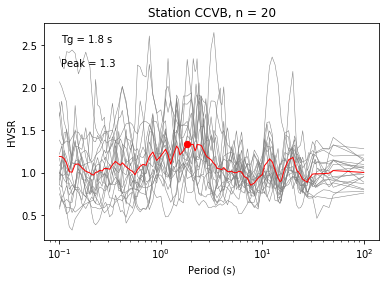

Match!


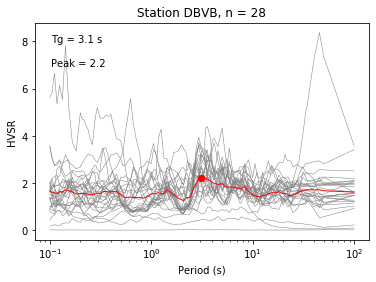

Match!


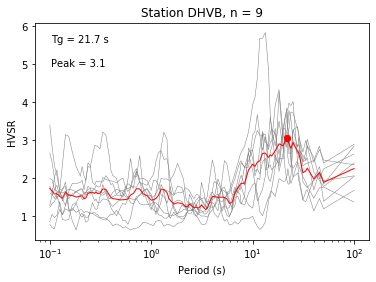

Match!


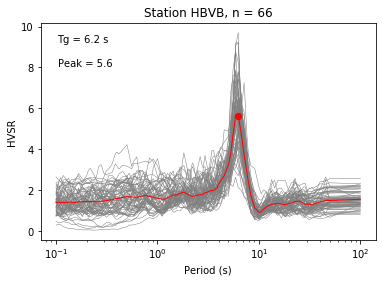

Match!


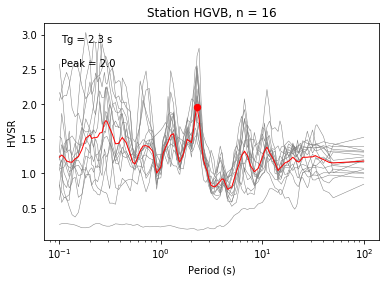

Match!


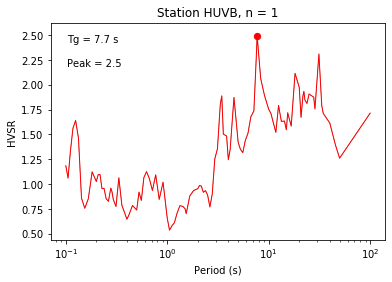

Match!


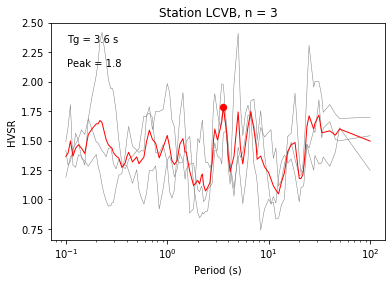

Match!


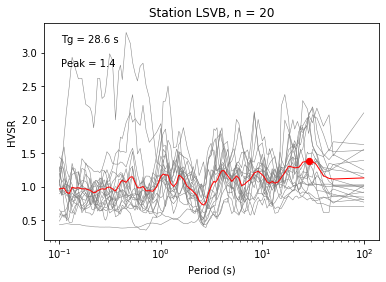

Match!


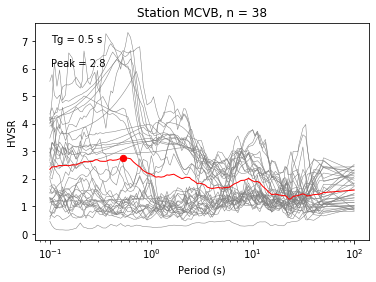

Match!


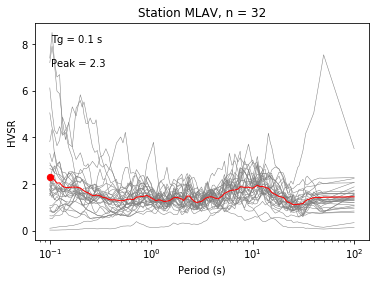

Match!


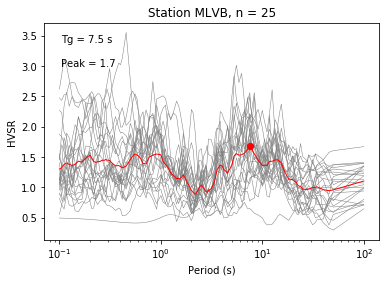

Match!


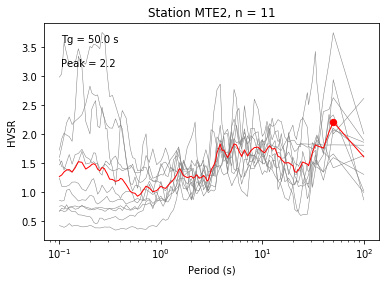

Match!


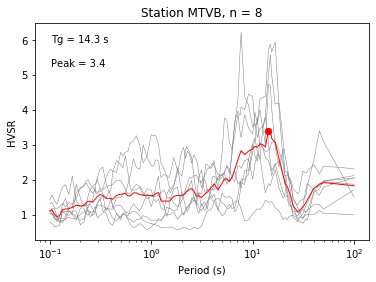

Match!


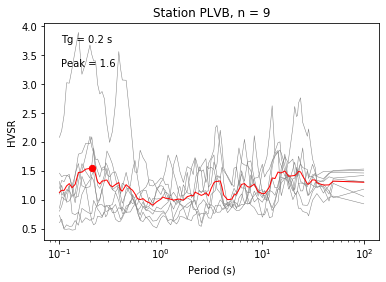

Match!


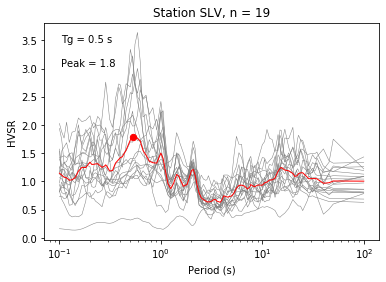

Match!


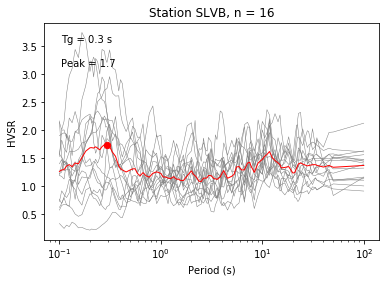

Match!


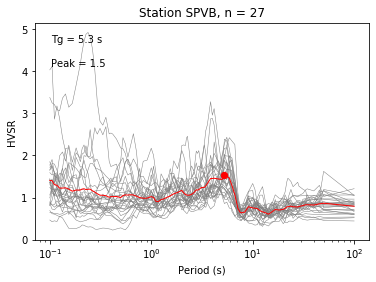

Match!


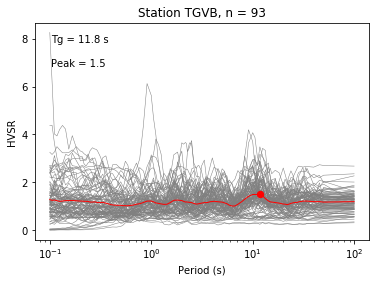

Match!


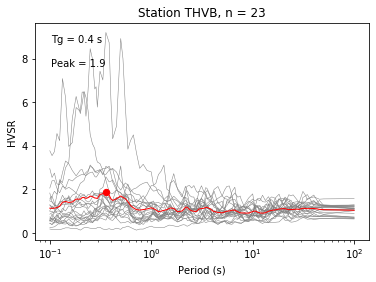

Match!


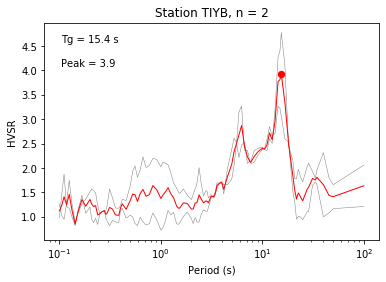

Match!


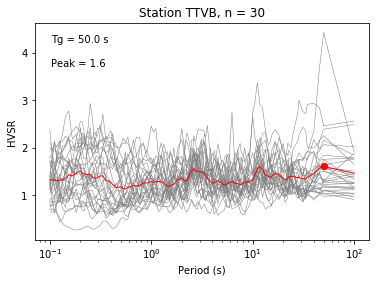

Match!


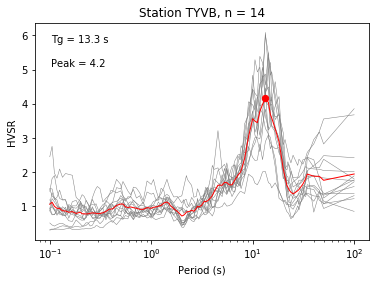

Match!


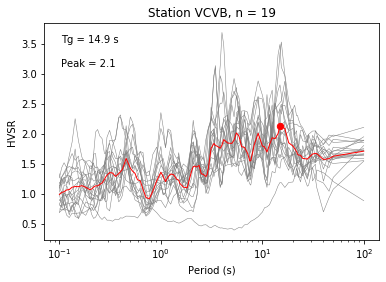

Match!


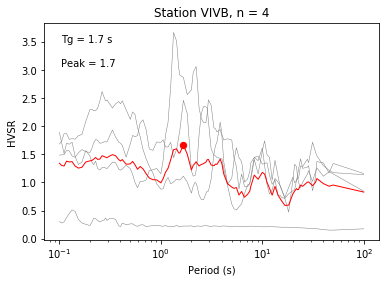

Match!


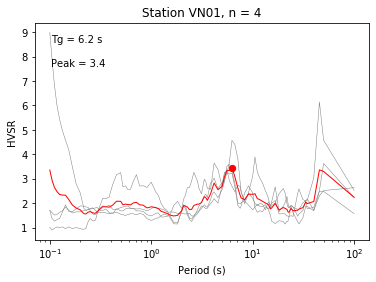

Match!


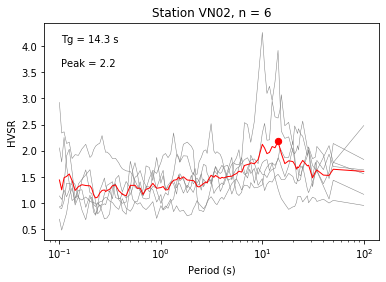

Match!


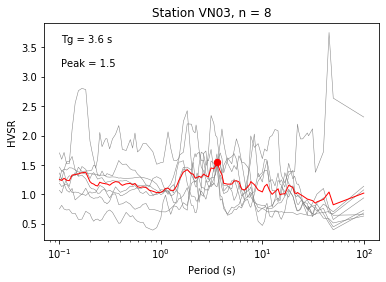

Match!


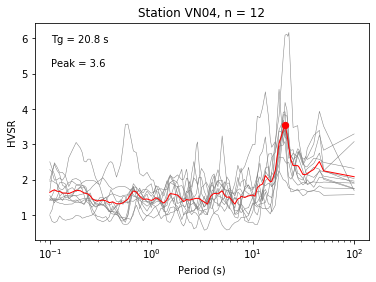

Match!


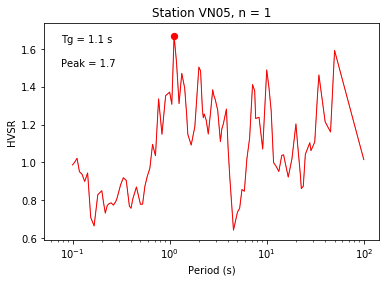

Match!


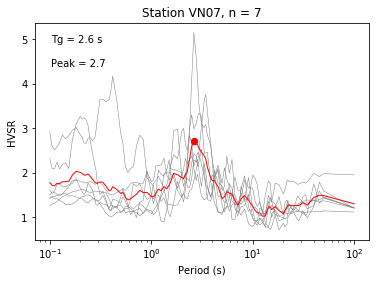

Match!


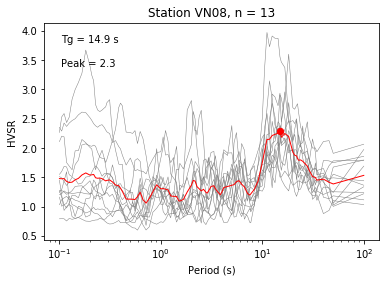

Match!


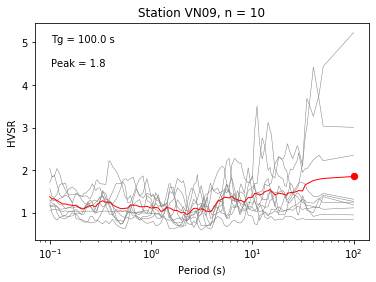

Match!


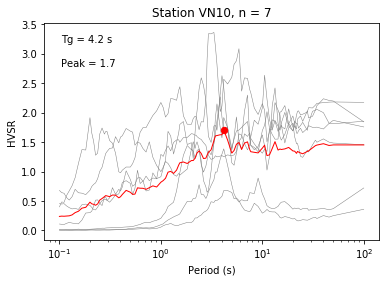

Match!


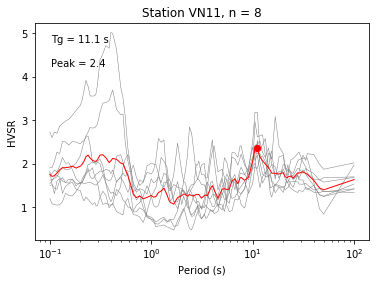

Match!


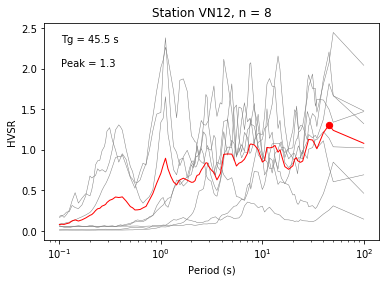

Match!


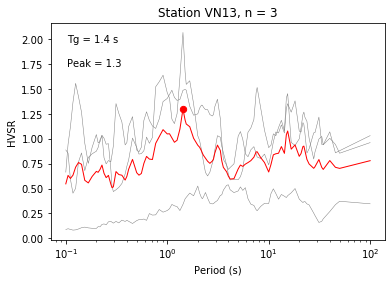

Match!


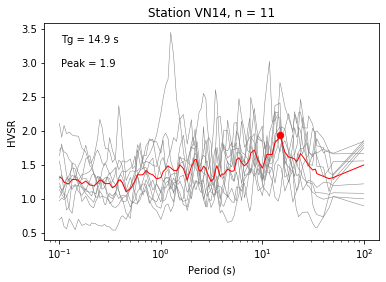

Match!


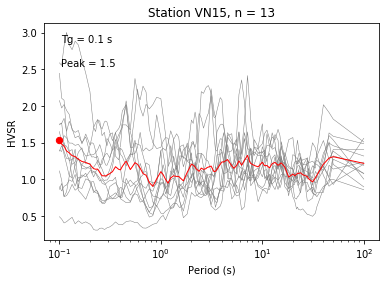

Match!


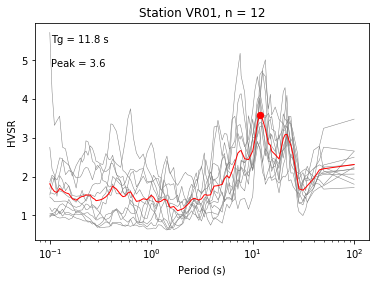

Match!


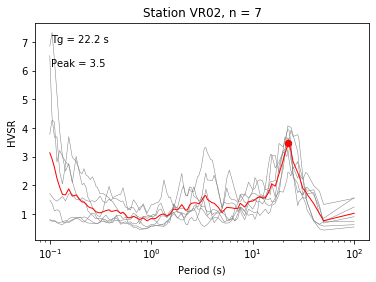

Match!


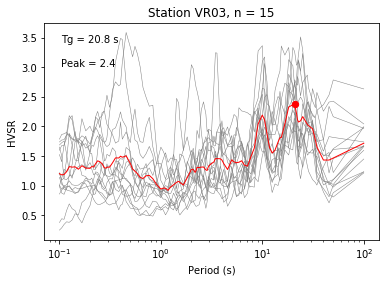

Match!


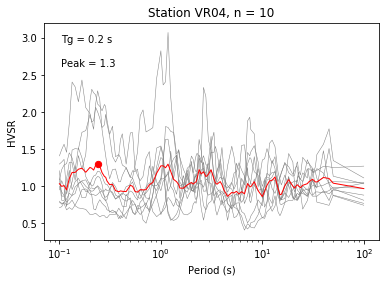

Match!


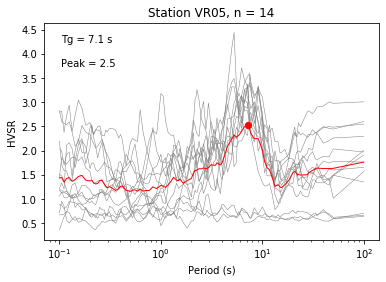

Match!


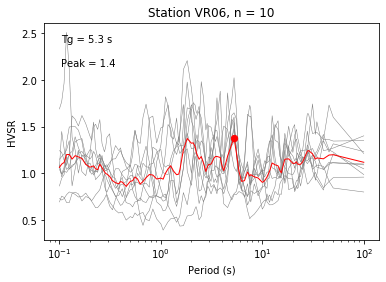

Match!


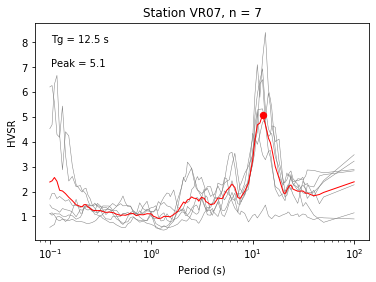

Match!


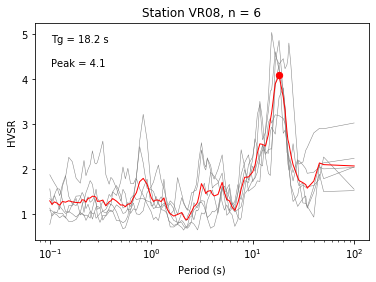

Match!


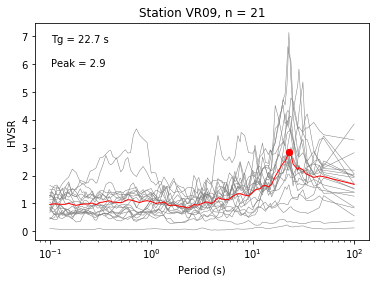

Match!


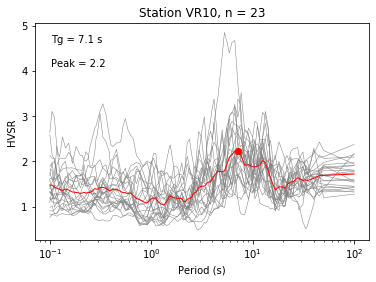

Match!


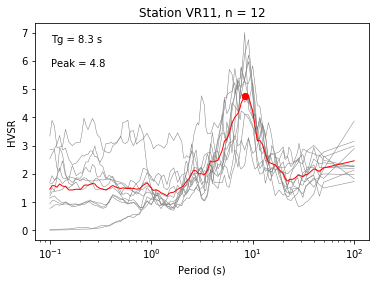

Match!


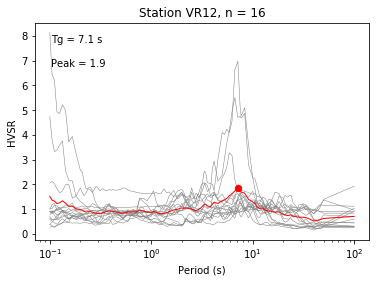

Match!


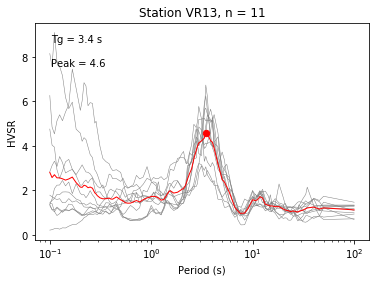

Match!


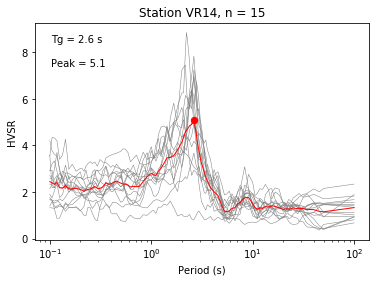

Match!


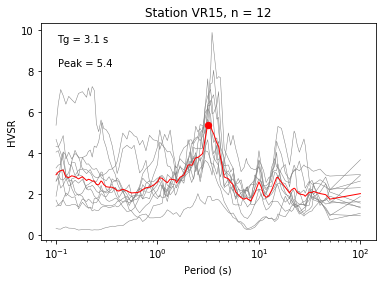

Match!


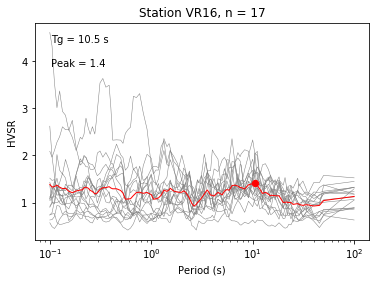

Match!


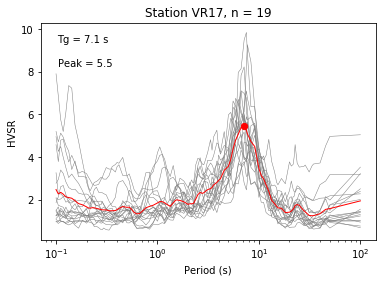

Match!


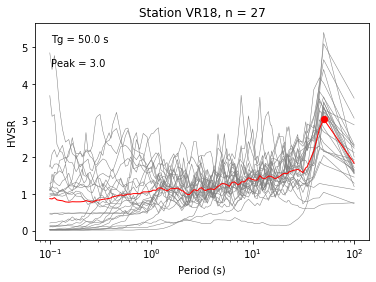

Match!


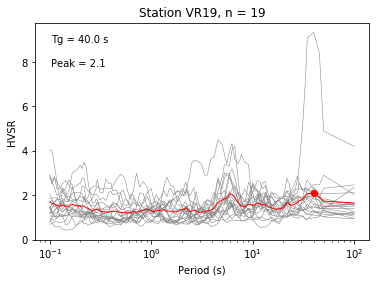

Match!


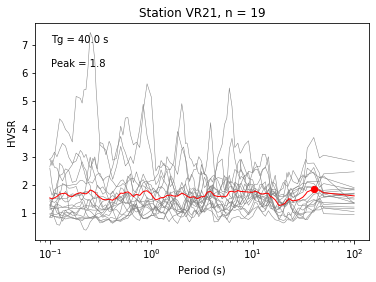

Match!


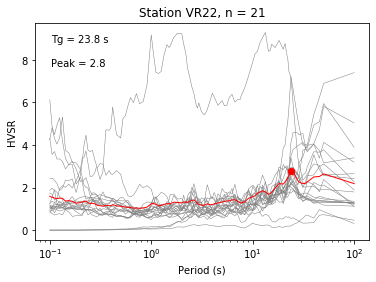

Match!


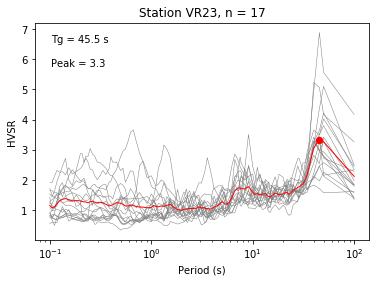

Match!


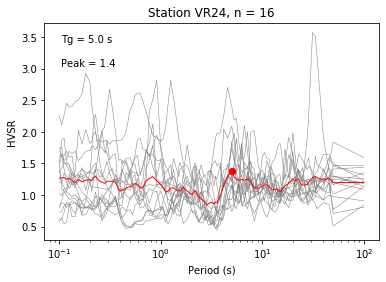

Match!


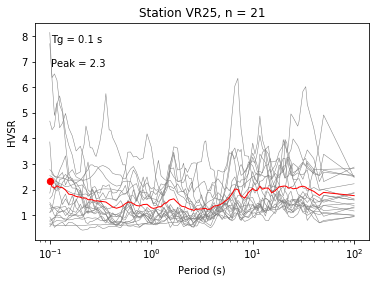

Match!


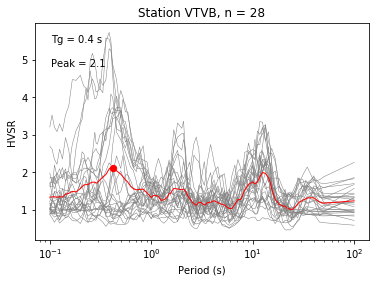

In [170]:
hvsrres = []
# for j in range(5,6):
for j in range(0,len(stal)):


    sta = stal[j]
    stlat = sahs.stlat[0]
    stlon = sahs.stlon[0]
    sahs = sah.query("STAID == '{}'".format(sta)).reset_index(drop=True)
    savs = sav.query("STAID == '{}'".format(sta)).reset_index(drop=True)
    if len(sahs) == len(savs):
        print("Match!")
        cols = sahs.columns[8:]
        hvrs = (sahs[cols]/savs[cols]).T.reset_index()
        hvrs["T"] = hvrs['index'].str.split(expand=True)[0].astype(float)
        plt.figure()
        hvrs_rec = hvrs[hvrs.columns[1:-1]]
        s = (hvrs[hvrs.columns[1:-1]]<10).all()
        r_ok = s[s].index
        n = len(r_ok)
        for i in r_ok:
            plt.plot(hvrs["T"],hvrs[i],c="gray",linewidth=0.5)
    #     plt.yscale('log')
        hvrs_mean = hvrs[r_ok].mean(axis=1)
        plt.plot(hvrs["T"],hvrs_mean,c="red",linewidth=1)

        peak = hvrs_mean.max()
        Tg = hvrs["T"][hvrs_mean.idxmax()]
#         Tg_ = (hvrs["T"][hvrs_mean.idxmax()]+hvrs["T"][hvrs_mean.idxmax()-1])/2
        plt.scatter(Tg,peak,c="r",zorder=10,s=40)
        text = "Tg = {} s \n \nPeak = {}".format(round(Tg,1), round(peak,1))
        plt.text(0.05,0.8,text,transform=plt.gca().transAxes)
        plt.xscale('log')
        plt.xlabel("Period (s)")
        plt.ylabel("HVSR")
        plt.title("Station {}, n = {}".format(sta,n))
        plt.savefig("../figs/hvsr/{}.pdf".format(sta))
        plt.show()
        hvsrr = {"sta":sta, "stlat":stlat, "stlon":stlon, "Tg": round(Tg,2), "peak":round(peak,2), "n":n }
        hvsrres.append(hvsrr)
    else:
        print("Not Match")


In [175]:
dfhvsr = pd.DataFrame(hvsrres)
dfhvsr[["sta","stlon","stlat","n","Tg","peak"]].to_csv("../data/sta.csv")

In [176]:
dfhvsr[["sta","stlon","stlat","n","Tg","peak"]]

sta    stlon    stlat   n     Tg  peak
0   BCVB  104.899  22.2523  13  12.50  2.30
1   BGVB  105.772  21.8850  10   9.09  4.25
2   BKVB  106.227  21.2902  15  14.29  3.08
3   CBVB  105.856  22.1500  23   0.50  1.69
4   CCVB  106.271  22.6599  20   1.82  1.34
5   DBVB  104.856  19.0570  28   3.12  2.22
6   DHVB  103.018  21.3900   9  21.74  3.06
7   HBVB  105.184  21.6270  66   6.25  5.63
8   HGVB  105.328  20.8422  16   2.27  1.95
9   HUVB  104.899  22.2523   1   7.69  2.50
10  LCVB  107.569  16.4150   3   3.57  1.78
11  LSVB  103.155  22.0390  20  28.57  1.39
12  MCVB  106.749  21.8527  38   0.53  2.76
13  MLAV  104.648  20.8325  32   0.10  2.28
14  MLVB  103.154  22.0420  25   7.52  1.68
15  MTE2  103.418  21.5922  11  50.00  2.21
16  MTVB  102.618  22.4857   8  14.29  3.39
17  PLVB  106.343  21.5370   9   0.21  1.55
18   SLV  106.628  20.8050  19   0.53  1.79
19  SLVB  103.907  21.3253  16   0.29  1.74
20  SPVB  103.965  21.3300  27   5.26  1.53
21  TGVB  103.842  22.3940  93  11.76  1.50
22  THVB  103.418  21.5920  23   0.36  1.86
23  TIYB  102.618  22.4855   2  15.38  3.92
24  TTVB  107.389  21.3350  30  50.00  1.61
25  TYVB  104.379  21.4660  14  13.33  4.18
26  VCVB  107.389  21.3349  19  14.93  2.13
27  VIVB  104.594  21.5758   4   1.67  1.67
28  VN01  105.697  16.6500   4   6.25  3.45
29  VN02  102.515  22.5650   6  14.29  2.18
..   ...      ...      ...  ..    ...   ...
37  VN11  103.079  21.6940   8  11.11  2.37
38  VN12  103.635  21.6700   8  45.45  1.31
39  VN13  103.241  21.5320   3   1.43  1.30
40  VN14  103.233  21.3000  11  14.93  1.94
41  VN15  103.587  20.9240  13   0.10  1.53
42  VR01  103.481  21.2540  12  11.76  3.58
43  VR02  106.745  21.9160   7  22.22  3.47
44  VR03  106.673  21.8630  15  20.83  2.38
45  VR04  106.604  21.8000  10   0.24  1.30
46  VR05  106.543  21.7360  14   7.14  2.53
47  VR06  106.447  21.6740  10   5.26  1.38
48  VR07  106.373  21.6220   7  12.50  5.08
49  VR08  106.289  21.5600   6  18.18  4.09
50  VR09  106.222  21.5180  21  22.73  2.86
51  VR10  106.152  21.4560  23   7.14  2.23
52  VR11  106.074  21.4070  12   8.33  4.76
53  VR12  105.999  21.3520  16   7.14  1.85
54  VR13  105.919  21.2920  11   3.45  4.60
55  VR14  105.853  21.2230  15   2.63  5.07
56  VR15  105.774  21.1660  12   3.12  5.39
57  VR16  105.700  21.1100  17  10.53  1.42
58  VR17  105.626  21.0540  19   7.14  5.46
59  VR18  105.553  21.0060  27  50.00  3.05
60  VR19  105.492  20.9560  19  40.00  2.10
61  VR21  105.385  20.8910  19  40.00  1.84
62  VR22  105.259  20.7610  21  23.81  2.80
63  VR23  105.182  20.6960  17  45.45  3.33
64  VR24  105.094  20.6620  16   5.00  1.38
65  VR25  105.036  20.6030  21   0.10  2.33
66  VTVB  104.973  20.5190  28   0.42  2.13

[67 rows x 6 columns]